# 다항 회귀 
- 직선으로 많은 데이터를 만족할 수 없는 선형회귀의 경우 사용
- 기존 피쳐를 조합해서 항을 늘여주는 작업 진행 -> 전처리에서 진행

In [2]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [3]:
np.arange(4).reshape(-1,2) # -1 : 시스템 마음대로 

array([[0, 1],
       [2, 3]])

In [4]:
np.arange(4).reshape(2,-1)


array([[0, 1],
       [2, 3]])

In [5]:
np.arange(4).reshape(2,-1,2) # 3차원 -> 2장으로 행은 마음대로 2열 

array([[[0, 1]],

       [[2, 3]]])

In [21]:
np.arange(4).reshape(2,-1,2).ndim

3

In [7]:
x=np.arange(10).reshape(-1,2)
y=np.arange(5)
x.shape, y.shape

((5, 2), (5,))

In [8]:
#feature 2개를 조합해서 늘리기
poly=PolynomialFeatures()

# poly.fit(x)
# poly.transform(x)

poly.fit_transform(x)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  6.,  7., 36., 42., 49.],
       [ 1.,  8.,  9., 64., 72., 81.]])

In [9]:
#feature 2개를 조합해서 늘리기
poly=PolynomialFeatures(include_bias=False) # include_bias=False : 절편 삭제 

poly.fit_transform(x)

array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.],
       [ 6.,  7., 36., 42., 49.],
       [ 8.,  9., 64., 72., 81.]])

In [10]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

## 모델에 적용

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [13]:
from sklearn.pipeline import Pipeline

pipe=Pipeline([('poly',poly),('lrmodel',model)])

pipe.fit(x,y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('lrmodel', LinearRegression())])

In [14]:
pipe.named_steps['lrmodel']

LinearRegression()

In [15]:
pipe.named_steps['lrmodel'].coef_

array([ 1.25000000e-01,  1.25000000e-01, -1.25000000e-01,  8.88786414e-18,
        1.25000000e-01])

## 다항회귀를 이용한 과소적합 및 과적합 이해

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [17]:
def true_fun(x):
    return np.cos(1.5*np.pi*x)

In [18]:
np.random.seed(0)
n_samples=30
x=np.sort(np.random.rand(n_samples))
x.shape

(30,)

In [19]:
y=true_fun(x)+np.random.randn(n_samples)*0.1
y.shape

(30,)


 Degree 1 회귀계수는 [-1.61] 입니다.
Degree 1 MSE 0.40772896250986845 입니다.

 Degree 4 회귀계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 0.043208749872317626 입니다.

 Degree 15 회귀계수는 [-2.98292000e+03  1.03899180e+05 -1.87415809e+06  2.03715961e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08] 입니다.
Degree 15 MSE 182493841.77304456 입니다.


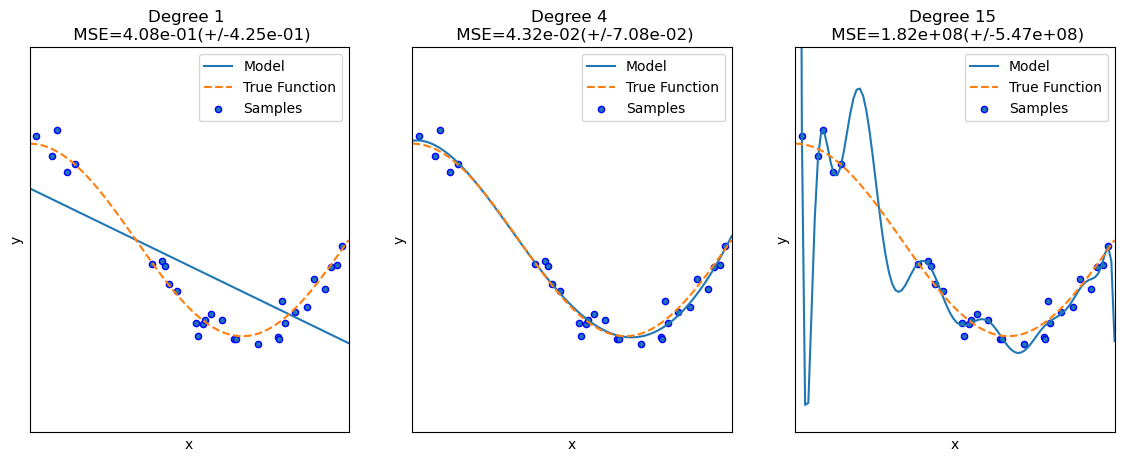

In [20]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

for i in range(len(degrees)):
    ax=plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())

    polynomial_feature=PolynomialFeatures(degree=degrees[i],include_bias=False)
    linear_regression=LinearRegression()
    pipeline=Pipeline([('polynominal_feature',polynomial_feature),
                        ('linear_regression',linear_regression)])
    pipeline.fit(x.reshape(-1,1),y)

    scores=cross_val_score(pipeline,x.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)

    coefficients=pipeline.named_steps['linear_regression'].coef_
    print('\n Degree {0} 회귀계수는 {1} 입니다.'.format(degrees[i],np.round(coefficients,2)))
    print('Degree {0} MSE {1} 입니다.'.format(degrees[i],-1*np.mean(scores)))

    x_test=np.linspace(0,1,100)

    plt.plot (x_test,pipeline.predict(x_test[:,np.newaxis]),label='Model')

    plt.plot(x_test,true_fun(x_test),'--',label='True Function')
    plt.scatter(x,y,edgecolors='b',s=20,label='Samples')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc='best')
    plt.title('Degree {} \n MSE={:.2e}(+/-{:.2e})'.format(degrees[i],-scores.mean(),scores.std()))

plt.show()